<a href="https://colab.research.google.com/github/VitalyGladyshev/Medicine-HG-COPD/blob/main/Med_Models_COPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модели - ХОБЛ хроническая обструктивная болезнь лёгких

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def classification_metrics(y, pred):
    pre = accuracy_score(y, pred)
    print(f"accuracy score:\t\t{pre:.5f}\n")

    pre = f1_score(y, pred, average="macro")
    print(f"f1 score:\t\t{pre:.5f}")

    pre = precision_score(y, pred, average="macro")
    print(f"precision score:\t{pre:.5f}")

    pre = recall_score(y, pred, average="macro")
    print(f"recall score:\t\t{pre:.5f}")

## Группа 3

In [ ]:
data_3 = pd.read_csv("ikm_start_3.csv")
data_3.head()

,эндотели,ЧСС,E_A,СрДЛА,ТС_ПЖ,ПП,IVRT,E_A_ЛЖ,ЛП,ТМЖП,...,S,Imax,Imax_S,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст
0,1.489,68,0.5,24.9,0.3,38,70,0.9,38,11,...,4100,755,0.184146,3,27,4.000,5.4,20,1,48
1,1.315,67,0.6,18.4,0.4,38,71,0.8,37,9,...,2437,573,0.235125,3,30,4.000,5.5,27,0,59
2,2.874,68,0.3,18.7,0.3,37,72,0.9,36,8,...,1765,356,0.201700,1,85,2.874,5.6,10,1,40
3,16.182,68,0.3,24.8,0.7,36,73,0.9,35,9,...,1765,543,0.307649,2,75,16.182,5.7,15,1,54
4,9.134,69,0.5,18.4,0.4,36,83,0.8,34,11,...,657,122,0.185693,1,-1,9.134,5.8,-1,0,45


In [ ]:
data_3.describe()

,эндотели,ЧСС,E_A,СрДЛА,ТС_ПЖ,ПП,IVRT,E_A_ЛЖ,ЛП,ТМЖП,...,S,Imax,Imax_S,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1.168613,71.419355,0.606452,19.948387,0.403226,37.741935,81.322581,0.841935,36.903226,9.612903,...,1624.419355,363.741935,0.218065,2.032258,22.677419,3.568290,5.580645,6.741935,0.322581,51.225806
std,3.772435,9.611709,0.169185,3.281755,0.119677,1.590969,6.347635,0.187571,1.955417,1.054433,...,1009.541175,272.115413,0.064453,0.706346,31.410600,3.119019,0.588455,10.168473,0.475191,7.495375
min,-1.000000,58.000000,0.300000,16.200000,0.300000,35.000000,70.000000,0.400000,34.000000,8.000000,...,248.000000,50.000000,0.111834,1.000000,-1.000000,0.895000,4.700000,-1.000000,0.000000,40.000000
25%,-1.000000,65.500000,0.500000,17.400000,0.300000,37.000000,77.000000,0.750000,35.500000,9.000000,...,657.000000,122.000000,0.172114,2.000000,-1.000000,1.826500,5.050000,-1.000000,0.000000,45.500000
50%,-1.000000,68.000000,0.600000,18.700000,0.400000,38.000000,82.000000,0.900000,37.000000,10.000000,...,1765.000000,356.000000,0.201613,2.000000,-1.000000,2.300000,5.600000,-1.000000,0.000000,52.000000
75%,1.438500,81.500000,0.800000,24.150000,0.450000,38.500000,85.500000,0.950000,38.000000,10.500000,...,2307.000000,458.000000,0.235744,2.500000,52.500000,4.050000,5.950000,14.000000,1.000000,56.500000
max,16.182000,91.000000,0.800000,24.900000,0.700000,41.000000,100.000000,1.100000,41.000000,11.000000,...,4100.000000,1049.000000,0.368047,3.000000,88.000000,16.182000,6.700000,30.000000,1.000000,67.000000


In [ ]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   эндотели   31 non-null     float64
 1   ЧСС        31 non-null     int64  
 2   E_A        31 non-null     float64
 3   СрДЛА      31 non-null     float64
 4   ТС_ПЖ      31 non-null     float64
 5   ПП         31 non-null     int64  
 6   IVRT       31 non-null     int64  
 7   E_A_ЛЖ     31 non-null     float64
 8   ЛП         31 non-null     int64  
 9   ТМЖП       31 non-null     int64  
 10  ТЗС_ЛЖ     31 non-null     int64  
 11  ФВ         31 non-null     int64  
 12  УО         31 non-null     int64  
 13  КДО_ЛЖ     31 non-null     int64  
 14  КСО_ЛЖ     31 non-null     int64  
 15  КДР_ЛЖ     31 non-null     int64  
 16  КСР_ЛЖ     31 non-null     int64  
 17  no2        31 non-null     float64
 18  no3        31 non-null     float64
 19  эзвд       31 non-null     float64
 20  ДК         3

In [ ]:
data_3 = data_3.sample(frac=1, random_state=42)

In [ ]:
data_3_train = data_3.drop(['стп_ХОБЛ'], axis=1)
data_3_train.head(3)

,эндотели,ЧСС,E_A,СрДЛА,ТС_ПЖ,ПП,IVRT,E_A_ЛЖ,ЛП,ТМЖП,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
27,-1.0,62,0.5,16.2,0.6,36,85,0.6,34,11,...,75.082948,248,50,0.201613,-1,1.9,4.7,-1,0,55
15,-1.0,91,0.8,18.6,0.3,38,100,0.7,39,8,...,25.244033,1987,399,0.200805,88,1.2,5.6,14,0,63
23,-1.0,62,0.7,24.2,0.4,38,81,1.0,35,10,...,56.692281,646,93,0.143963,-1,1.2,6.4,-1,0,41


In [ ]:
# data_3_train.isna()
data_3_train.tail(3)

,эндотели,ЧСС,E_A,СрДЛА,ТС_ПЖ,ПП,IVRT,E_A_ЛЖ,ЛП,ТМЖП,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
28,-1.000,67,0.6,16.3,0.4,37,86,0.9,35,9,...,21.512208,275,65,0.236364,-1,2.300,4.8,-1,0,41
19,-1.000,66,0.8,24.3,0.7,40,78,0.5,39,9,...,38.583736,2347,455,0.193865,70,2.100,6.0,12,1,54
6,0.895,70,0.7,19.1,0.4,38,86,0.9,38,9,...,73.835171,657,122,0.185693,-1,0.895,4.7,-1,1,46


In [ ]:
data_3_y = np.asarray(data_3[['стп_ХОБЛ']]).ravel()
data_3_y[:5]

array([2, 1, 1, 3, 2])

In [ ]:
scaler_3_train = StandardScaler()
data_3_scaled = pd.DataFrame(scaler_3_train.fit_transform(data_3_train))
data_3_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.584360,-0.996187,-0.639602,-1.161070,1.671390,-1.112988,0.588913,-1.311157,-1.509252,1.337236,...,0.292348,-1.385948,-1.172032,-0.259473,-0.766264,-0.543718,-1.521275,-0.773952,-0.690066,0.511860
1,-0.584360,2.070840,1.162913,-0.417666,-0.876795,0.164887,2.991060,-0.769212,1.090015,-1.554926,...,-1.520494,0.365091,0.131712,-0.272211,2.114011,-0.771858,0.033435,0.725580,-0.690066,1.596828
2,-0.584360,-0.996187,0.562075,1.316946,-0.027400,0.164887,-0.051659,0.856622,-0.989398,0.373182,...,-0.376595,-0.985193,-1.011399,-1.168707,-0.766264,-0.771858,1.415399,-0.773952,-0.690066,-1.386834
3,-0.584360,-0.361629,1.162913,1.409871,-0.876795,0.164887,-0.852375,-1.311157,-0.989398,-0.590872,...,-0.490887,-0.078962,0.766774,2.365453,-0.054286,-0.120031,0.378926,2.325081,-0.690066,1.054344
4,-0.008518,1.119004,-0.639602,-0.820343,-0.876795,-1.112988,-1.172661,-1.853102,2.129722,0.373182,...,0.577912,-1.007345,-0.929215,-0.532606,-0.766264,-0.792390,-1.175784,-0.773952,-0.690066,-0.301866


### LogisticRegression

In [ ]:
lr_classifier = make_pipeline(LogisticRegression(solver="liblinear", random_state=42))
lr_rmses = cross_val_score(lr_classifier, data_3_scaled, data_3_y, cv=5)
print(f"{pd.Series(lr_rmses).describe()['mean']:.4f} {lr_rmses}")

0.5476 [0.57142857 0.5        0.5        0.5        0.66666667]


### Support Vector Machine

In [ ]:
svm_classifier = make_pipeline(SVC(gamma="auto", random_state=42))
svm_rmses = cross_val_score(svm_classifier, data_3_scaled, data_3_y, cv=5)
print(f"{pd.Series(svm_rmses).describe()['mean']:.4f} {svm_rmses}")

0.5143 [0.57142857 0.5        0.5        0.5        0.5       ]


### K Nearest Neighbours

In [ ]:
for n in range (2, 21):
    knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
    knn_rmses = cross_val_score(knn_classifier, data_3_scaled, data_3_y, cv=5)
    print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 2: 0.3619 [0.14285714 0.66666667 0.16666667 0.33333333 0.5       ]
n 3: 0.3905 [0.28571429 0.5        0.16666667 0.5        0.5       ]
n 4: 0.3238 [0.28571429 0.5        0.16666667 0.33333333 0.33333333]
n 5: 0.4857 [0.42857143 0.66666667 0.16666667 0.66666667 0.5       ]
n 6: 0.4190 [0.42857143 0.33333333 0.16666667 0.66666667 0.5       ]
n 7: 0.4190 [0.42857143 0.5        0.16666667 0.5        0.5       ]
n 8: 0.4238 [0.28571429 0.5        0.33333333 0.5        0.5       ]
n 9: 0.3190 [0.42857143 0.33333333 0.16666667 0.16666667 0.5       ]
n 10: 0.3905 [0.28571429 0.33333333 0.33333333 0.5        0.5       ]
n 11: 0.4476 [0.57142857 0.33333333 0.33333333 0.5        0.5       ]
n 12: 0.3857 [0.42857143 0.33333333 0.16666667 0.5        0.5       ]
n 13: 0.4190 [0.42857143 0.33333333 0.33333333 0.5        0.5       ]
n 14: 0.4810 [0.57142857 0.33333333 0.5        0.5        0.5       ]
n 15: 0.5143 [0.57142857 0.5        0.5        0.5        0.5       ]
n 16: 0.5143 [0.57142857 0.5

In [ ]:
n = 15
knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
knn_rmses = cross_val_score(knn_classifier, data_3_scaled, data_3_y, cv=5)
print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 15: 0.5143 [0.57142857 0.5        0.5        0.5        0.5       ]


### DecisionTreeClassifier

In [ ]:
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_3_scaled, data_3_y, cv=5)
print(f"{pd.Series(dtc_rmses).describe()['mean']:.4f} {dtc_rmses}")

0.5476 [0.57142857 0.5        0.33333333 0.83333333 0.5       ]


### RandomForestClassifier

In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_3_scaled, data_3_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.5762 [0.71428571 0.33333333 0.5        0.66666667 0.66666667]


### GradientBoostingClassifier

In [ ]:
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_3_scaled, data_3_y, cv=5)
print(f"{pd.Series(gb_rmses).describe()['mean']:.4f} {gb_rmses}")

0.5571 [0.28571429 0.66666667 0.5        0.66666667 0.66666667]


## Группа 2

In [ ]:
data_2 = pd.read_csv("ikm_start_2.csv")
data_2.head()

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1.388,75,8,13,44.0,61.0,87,145,11.0,12.8,...,3,25,1.388,7.4,25,1,64,3,1,3
1,2.187,71,7,14,34.2,52.0,74,123,11.1,12.9,...,3,29,2.187,7.5,20,1,60,3,2,3
2,0.946,72,8,12,34.3,54.4,74,128,11.2,13.0,...,1,87,0.946,7.6,10,1,42,2,2,2
3,6.521,73,-1,12,38.6,57.3,76,130,11.3,13.1,...,3,34,6.521,7.7,20,1,82,3,1,3
4,3.229,74,7,15,38.5,56.8,77,136,11.4,13.2,...,2,59,3.229,7.8,23,1,65,3,1,3


In [ ]:
data_2.describe()

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,2.389164,72.477612,7.044776,13.746269,38.871642,56.144776,81.880597,134.582090,12.685075,14.529851,...,2.253731,29.388060,9.956015,6.750746,10.462687,0.477612,55.194030,2.477612,1.925373,3.014925
std,6.335326,9.193803,1.753203,2.407962,3.516920,3.459256,7.576923,10.083213,0.635146,1.026322,...,0.804218,30.771374,5.062846,1.232068,10.586338,0.503268,10.554676,0.611957,0.559042,0.590134
min,-1.000000,57.000000,-1.000000,10.000000,34.100000,49.000000,69.000000,114.000000,11.000000,12.800000,...,1.000000,-1.000000,0.946000,3.700000,-1.000000,0.000000,40.000000,1.000000,1.000000,2.000000
25%,-1.000000,67.000000,6.000000,12.000000,35.650000,54.500000,76.000000,128.000000,12.650000,13.650000,...,2.000000,-1.000000,7.800000,5.850000,-1.000000,0.000000,42.500000,2.000000,2.000000,3.000000
50%,-1.000000,69.000000,7.000000,14.000000,38.600000,56.800000,80.000000,135.000000,12.800000,14.600000,...,2.000000,28.000000,8.996000,7.100000,12.000000,0.000000,57.000000,3.000000,2.000000,3.000000
75%,2.094000,78.500000,8.000000,15.500000,41.100000,57.300000,87.000000,144.500000,13.000000,15.400000,...,3.000000,49.000000,11.546000,7.700000,20.000000,1.000000,62.500000,3.000000,2.000000,3.000000
max,25.000000,91.000000,10.000000,18.000000,45.700000,64.400000,99.000000,152.000000,13.900000,16.200000,...,3.000000,88.000000,25.000000,8.400000,30.000000,1.000000,82.000000,3.000000,3.000000,4.000000


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   эндотели    67 non-null     float64
 1   ЧСС         67 non-null     int64  
 2   дадпу       67 non-null     int64  
 3   садсу       67 non-null     int64  
 4   дадуп       67 non-null     float64
 5   садуп       67 non-null     float64
 6   дадн        67 non-null     int64  
 7   садн        67 non-null     int64  
 8   вдадн       67 non-null     float64
 9   вдадд       67 non-null     float64
 10  всадн       67 non-null     float64
 11  всадд       67 non-null     float64
 12  сад1        67 non-null     int64  
 13  дад1        67 non-null     int64  
 14  E_A         67 non-null     float64
 15  СрДЛА       67 non-null     float64
 16  ТС_ПЖ       67 non-null     float64
 17  ПП          67 non-null     int64  
 18  IVRT        67 non-null     int64  
 19  E_A_ЛЖ      67 non-null     flo

In [ ]:
data_2 = data_2.sample(frac=1, random_state=42)

In [ ]:
data_2_train = data_2.drop(['стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_2_train.head(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
36,-1.000,67,7,13,39.5,61.1,94,151,12.7,13.1,...,25.244033,1987,399,0.200805,88,8.900,5.1,14,0,63
16,9.615,86,6,14,38.6,57.3,76,130,12.6,14.7,...,38.583736,2347,455,0.193865,70,9.615,5.6,12,1,54
4,3.229,74,7,15,38.5,56.8,77,136,11.4,13.2,...,78.883243,1459,362,0.248115,59,3.229,7.8,23,1,65


In [ ]:
# data_2_train.isna()
data_2_train.tail(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
60,-1.000,89,5,16,35.7,55.5,86,151,13.1,15.6,...,8.437483,3169,1049,0.331019,-1,8.8,4.7,-1,0,60
14,1.694,84,8,12,34.3,54.4,74,128,12.4,14.5,...,40.733965,1796,489,0.272272,41,11.0,5.4,16,1,57
51,-1.000,67,8,14,38.6,57.3,76,130,13.4,14.7,...,107.341071,3169,1049,0.331019,-1,8.9,8.4,-1,0,43


In [ ]:
data_2_y = np.asarray(data_2[['стп_ХОБЛ']]).ravel()
data_2_y[:5]

array([1, 2, 2, 3, 1])

In [ ]:
scaler_2_train = StandardScaler()
data_2_scaled = pd.DataFrame(scaler_2_train.fit_transform(data_2_train))
data_2_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.539000,-0.600291,-0.025732,-0.312256,0.180016,1.443265,1.611587,1.640531,0.023676,-1.403694,...,-1.101388,-1.032485,-1.106789,-0.820286,1.919131,-0.210155,-1.349929,0.336661,-0.956183,0.745156
1,1.149171,1.481916,-0.600422,0.106167,-0.077821,0.336472,-0.781977,-0.457857,-0.134956,0.167037,...,-0.840262,-0.544773,-0.923269,-0.907271,1.329757,-0.067865,-0.941045,0.146313,1.045825,-0.113982
2,0.133564,0.166838,-0.025732,0.524590,-0.106470,0.190841,-0.649001,0.141682,-2.038545,-1.305523,...,-0.051398,-1.747795,-1.228042,-0.227374,0.969584,-1.338730,0.858047,1.193230,1.045825,0.936076
3,-0.186576,0.714787,-0.600422,-0.730679,0.323258,1.996661,0.946708,0.441452,-1.245383,-0.814670,...,0.058387,0.456391,-0.412038,-0.855556,-0.045449,0.406770,1.266932,1.383579,1.045825,1.413375
4,-0.539000,-0.490701,0.548957,-0.312256,-0.278361,-2.080997,-1.446856,-1.656936,0.182309,-0.421987,...,-0.142009,0.494324,1.895060,1.955427,-0.994996,-0.886783,0.858047,-1.090953,-0.956183,-1.259500


### LogisticRegression

In [ ]:
lr_classifier = make_pipeline(LogisticRegression(solver="liblinear", random_state=42))
lr_rmses = cross_val_score(lr_classifier, data_2_scaled, data_2_y, cv=5)
print(f"{pd.Series(lr_rmses).describe()['mean']:.4f} {lr_rmses}")

0.5978 [0.57142857 0.57142857 0.61538462 0.69230769 0.53846154]


### Support Vector Machine

In [ ]:
svm_classifier = make_pipeline(SVC(gamma="auto", random_state=42))
svm_rmses = cross_val_score(svm_classifier, data_2_scaled, data_2_y, cv=5)
print(f"{pd.Series(svm_rmses).describe()['mean']:.4f} {svm_rmses}")

0.5659 [0.57142857 0.64285714 0.53846154 0.69230769 0.38461538]


### K Nearest Neighbours

In [ ]:
for n in range (2, 21):
    knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
    knn_rmses = cross_val_score(knn_classifier, data_2_scaled, data_2_y, cv=5)
    print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 2: 0.5088 [0.42857143 0.5        0.53846154 0.53846154 0.53846154]
n 3: 0.5670 [0.5        0.64285714 0.61538462 0.53846154 0.53846154]
n 4: 0.5703 [0.35714286 0.57142857 0.69230769 0.61538462 0.61538462]
n 5: 0.5077 [0.42857143 0.57142857 0.61538462 0.61538462 0.30769231]
n 6: 0.5538 [0.42857143 0.57142857 0.69230769 0.53846154 0.53846154]
n 7: 0.5989 [0.42857143 0.64285714 0.76923077 0.61538462 0.53846154]
n 8: 0.5846 [0.42857143 0.57142857 0.69230769 0.76923077 0.46153846]
n 9: 0.6154 [0.5        0.5        0.84615385 0.76923077 0.46153846]
n 10: 0.6451 [0.42857143 0.64285714 0.92307692 0.76923077 0.46153846]
n 11: 0.6121 [0.57142857 0.64285714 0.76923077 0.69230769 0.38461538]
n 12: 0.5835 [0.5        0.57142857 0.69230769 0.69230769 0.46153846]
n 13: 0.6253 [0.64285714 0.71428571 0.69230769 0.69230769 0.38461538]
n 14: 0.6099 [0.64285714 0.71428571 0.69230769 0.61538462 0.38461538]
n 15: 0.6099 [0.64285714 0.71428571 0.69230769 0.69230769 0.30769231]
n 16: 0.6110 [0.64285714 0.6

In [ ]:
n = 10
knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
knn_rmses = cross_val_score(knn_classifier, data_2_scaled, data_2_y, cv=5)
print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 10: 0.6451 [0.42857143 0.64285714 0.92307692 0.76923077 0.46153846]


### DecisionTreeClassifier

In [ ]:
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_2_scaled, data_2_y, cv=5)
print(f"{pd.Series(dtc_rmses).describe()['mean']:.4f} {dtc_rmses}")

0.7330 [0.57142857 0.78571429 0.76923077 0.76923077 0.76923077]


### RandomForestClassifier

In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_2_scaled, data_2_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.7473 [0.71428571 0.71428571 0.84615385 0.84615385 0.61538462]


### GradientBoostingClassifier

In [ ]:
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_2_scaled, data_2_y, cv=5)
print(f"{pd.Series(gb_rmses).describe()['mean']:.4f} {gb_rmses}")

0.8055 [0.78571429 0.85714286 0.92307692 0.76923077 0.69230769]


## Группы 2-3

In [ ]:
data_2_3 = pd.read_csv("ikm_start_2-3.csv")
data_2_3.head()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,2,1.388,75,8,13,44.0,61.0,87,145,11.0,...,3,25,1.388,7.4,25,1,64,3,1,3
1,2,2.187,71,7,14,34.2,52.0,74,123,11.1,...,3,29,2.187,7.5,20,1,60,3,2,3
2,2,0.946,72,8,12,34.3,54.4,74,128,11.2,...,1,87,0.946,7.6,10,1,42,2,2,2
3,2,6.521,73,-1,12,38.6,57.3,76,130,11.3,...,3,34,6.521,7.7,20,1,82,3,1,3
4,2,3.229,74,7,15,38.5,56.8,77,136,11.4,...,2,59,3.229,7.8,23,1,65,3,1,3


In [ ]:
data_2_3.describe()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,2.316327,2.003071,72.142857,4.500000,9.081633,26.259184,38.068367,55.663265,91.693878,8.356122,...,2.183673,27.265306,7.935408,6.380612,9.285714,0.428571,53.938776,1.724490,1.000000,1.744898
std,0.467433,5.660053,9.291388,4.028891,7.173366,18.861748,26.863330,39.242031,63.918990,6.418274,...,0.777876,30.971737,5.418907,1.199627,10.547878,0.497416,9.829281,1.258215,1.443078,1.938813
min,2.000000,-1.000000,57.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,-1.000000,0.895000,3.700000,-1.000000,0.000000,40.000000,0.000000,-1.000000,-1.000000
25%,2.000000,-1.000000,67.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.000000,-1.000000,3.361750,5.400000,-1.000000,0.000000,43.250000,0.000000,-1.000000,-1.000000
50%,2.000000,-1.000000,69.000000,6.000000,12.000000,36.200000,54.650000,76.000000,128.000000,12.700000,...,2.000000,25.000000,7.850000,6.350000,10.000000,0.000000,54.500000,2.000000,2.000000,3.000000
75%,3.000000,1.780000,79.750000,7.750000,14.000000,39.175000,57.300000,85.000000,140.000000,12.900000,...,3.000000,49.000000,10.475000,7.475000,18.000000,1.000000,60.750000,3.000000,2.000000,3.000000
max,3.000000,25.000000,91.000000,10.000000,18.000000,45.700000,64.400000,99.000000,152.000000,13.900000,...,3.000000,88.000000,25.000000,8.400000,30.000000,1.000000,82.000000,3.000000,3.000000,4.000000


In [ ]:
data_2_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   группа      98 non-null     int64  
 1   эндотели    98 non-null     float64
 2   ЧСС         98 non-null     int64  
 3   дадпу       98 non-null     int64  
 4   садсу       98 non-null     int64  
 5   дадуп       98 non-null     float64
 6   садуп       98 non-null     float64
 7   дадн        98 non-null     int64  
 8   садн        98 non-null     int64  
 9   вдадн       98 non-null     float64
 10  вдадд       98 non-null     float64
 11  всадн       98 non-null     float64
 12  всадд       98 non-null     float64
 13  сад1        98 non-null     int64  
 14  дад1        98 non-null     int64  
 15  E_A         98 non-null     float64
 16  СрДЛА       98 non-null     float64
 17  ТС_ПЖ       98 non-null     float64
 18  ПП          98 non-null     int64  
 19  IVRT        98 non-null     int

In [ ]:
data_2_3 = data_2_3.sample(frac=1, random_state=42)

In [ ]:
data_2_3_train = data_2_3.drop(['стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_2_3_train.head(3)

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
62,2,-1.0,89,9,14,35.4,54.7,84,146,12.8,...,110.377843,3114,1315,0.422286,-1,10.1,4.9,-1,0,65
40,2,-1.0,69,8,10,34.3,54.4,74,128,12.8,...,39.144204,3098,983,0.317301,-1,10.8,7.3,-1,0,61
94,3,-1.0,62,-1,-1,-1.0,-1.0,-1,-1,-1.0,...,75.082948,248,50,0.201613,-1,1.9,4.7,-1,0,55


In [ ]:
# data_2_3_train.isna()
data_2_3_train.tail(3)

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
14,2,1.694,84,8,12,34.3,54.4,74,128,12.4,...,40.733965,1796,489,0.272272,41,11.0,5.4,16,1,57
92,3,-1.000,58,-1,-1,-1.0,-1.0,-1,-1,-1.0,...,88.159408,738,199,0.269648,-1,4.1,6.6,-1,0,57
51,2,-1.000,67,8,14,38.6,57.3,76,130,13.4,...,107.341071,3169,1049,0.331019,-1,8.9,8.4,-1,0,43


In [ ]:
data_2_3_y = np.asarray(data_2_3[['стп_ХОБЛ']]).ravel()
data_2_3_y[:5]

array([3, 2, 2, 3, 2])

In [ ]:
scaler_2_3_train = StandardScaler()
data_2_3_scaled = pd.DataFrame(scaler_2_3_train.fit_transform(data_2_3_train))
data_2_3_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.680211,-0.533301,1.823604,1.122675,0.689168,0.487114,0.622303,0.725814,0.853977,0.695939,...,0.735340,0.736259,2.040640,2.188122,-0.917308,0.401505,-1.240573,-0.980159,-0.866025,1.131120
1,-0.680211,-0.533301,-0.339994,0.873192,0.128683,0.428495,0.611078,0.469675,0.570922,0.695939,...,-0.830887,0.719913,1.067588,0.846874,-0.917308,0.531347,0.770335,-0.980159,-0.866025,0.722080
2,1.470133,-0.533301,-1.097253,-1.372159,-1.412651,-1.452640,-1.461816,-1.451367,-1.457633,-1.465227,...,-0.040695,-2.191806,-1.666923,-0.631119,-0.917308,-1.119495,-1.408149,-0.980159,-0.866025,0.108521
3,-0.680211,-0.000368,1.715424,0.623709,0.549047,1.014684,0.760746,0.828270,0.570922,0.695939,...,0.027875,1.108142,0.173670,-0.716374,-0.073517,2.608811,-0.486482,1.497465,1.154701,1.028860
4,1.470133,-0.044409,1.715424,-1.372159,-1.412651,-1.452640,-1.461816,-1.451367,-1.457633,-1.465227,...,-0.713989,-0.446818,-0.471124,-0.215420,1.029902,-1.146762,-0.737846,0.258653,1.154701,-1.425378


### LogisticRegression

In [ ]:
lr_classifier = make_pipeline(LogisticRegression(solver="liblinear", random_state=42))
lr_rmses = cross_val_score(lr_classifier, data_2_3_scaled, data_2_3_y, cv=5)
print(f"{pd.Series(lr_rmses).describe()['mean']:.4f} {lr_rmses}")

0.6516 [0.75       0.75       0.6        0.52631579 0.63157895]


### Support Vector Machine

In [ ]:
svm_classifier = make_pipeline(SVC(gamma="auto", random_state=42))
svm_rmses = cross_val_score(svm_classifier, data_2_3_scaled, data_2_3_y, cv=5)
print(f"{pd.Series(svm_rmses).describe()['mean']:.4f} {svm_rmses}")

0.5500 [0.6        0.6        0.55       0.47368421 0.52631579]


### K Nearest Neighbours

In [ ]:
for n in range (2, 20):
    knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
    knn_rmses = cross_val_score(knn_classifier, data_2_3_scaled, data_2_3_y, cv=5)
    print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 2: 0.5389 [0.55       0.6        0.65       0.42105263 0.47368421]
n 3: 0.5600 [0.6        0.65       0.55       0.42105263 0.57894737]
n 4: 0.5711 [0.55       0.55       0.65       0.52631579 0.57894737]
n 5: 0.5584 [0.7        0.6        0.65       0.47368421 0.36842105]
n 6: 0.5079 [0.65       0.55       0.55       0.31578947 0.47368421]
n 7: 0.5789 [0.65       0.65       0.7        0.36842105 0.52631579]
n 8: 0.5279 [0.65       0.6        0.6        0.42105263 0.36842105]
n 9: 0.4968 [0.6        0.6        0.6        0.36842105 0.31578947]
n 10: 0.4874 [0.6        0.55       0.55       0.36842105 0.36842105]
n 11: 0.4753 [0.65       0.55       0.65       0.31578947 0.21052632]
n 12: 0.4963 [0.65       0.55       0.65       0.26315789 0.36842105]
n 13: 0.4968 [0.6        0.55       0.65       0.36842105 0.31578947]
n 14: 0.5079 [0.65       0.55       0.55       0.36842105 0.42105263]
n 15: 0.4768 [0.6        0.55       0.55       0.36842105 0.31578947]
n 16: 0.5189 [0.55       0.6

In [ ]:
n = 7
knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
knn_rmses = cross_val_score(knn_classifier, data_2_3_scaled, data_2_3_y, cv=5)
print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 7: 0.5789 [0.65       0.65       0.7        0.36842105 0.52631579]


### DecisionTreeClassifier

In [ ]:
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_2_3_scaled, data_2_3_y, cv=5)
print(f"{pd.Series(dtc_rmses).describe()['mean']:.4f} {dtc_rmses}")

0.8447 [0.95       0.95       0.85       0.73684211 0.73684211]


### RandomForestClassifier

In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_2_3_scaled, data_2_3_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.7221 [0.8        0.85       0.75       0.52631579 0.68421053]


### GradientBoostingClassifier

In [ ]:
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_2_3_scaled, data_2_3_y, cv=5)
print(f"{pd.Series(gb_rmses).describe()['mean']:.4f} {gb_rmses}")

0.8458 [0.95       0.8        0.9        0.73684211 0.84210526]


## Группы 1-3

In [ ]:
data_1_3 = pd.read_csv("ikm_start_1-3.csv")
data_1_3.head()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1,2.207,71,5,9,34.0,49.0,68,112,11.5,...,0,-1,2.207,4.0,-1,0,55,2,2,3
1,1,0.600,72,6,10,34.1,49.2,69,114,11.5,...,0,-1,0.600,4.1,-1,0,46,2,2,2
2,1,14.775,73,7,11,35.6,49.4,70,115,11.5,...,0,-1,14.775,4.2,-1,0,45,2,2,2
3,1,1.647,74,8,12,37.9,49.0,71,118,11.5,...,0,-1,1.647,4.3,-1,0,61,3,2,3
4,1,12.706,75,5,13,38.5,50.0,72,120,11.5,...,0,-1,12.706,4.4,-1,0,78,3,2,3


In [ ]:
data_1_3.describe()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.860000,1.996300,71.733333,5.106667,9.693333,29.784000,42.954667,61.626667,103.053333,9.738000,...,1.426667,17.466667,6.838760,6.259333,5.720000,0.406667,55.473333,1.953333,1.460000,2.260000
std,0.733018,5.195903,8.920730,3.421501,5.922255,16.017839,22.785518,32.774713,54.283470,5.531674,...,1.217031,28.401405,5.101542,1.283980,9.826085,0.492857,10.116567,1.160518,0.909532,1.276688
min,1.000000,-1.000000,57.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,-1.000000,0.600000,3.600000,-1.000000,0.000000,35.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.000000,66.000000,5.000000,9.000000,34.025000,49.000000,68.250000,112.500000,11.500000,...,0.000000,-1.000000,2.350000,5.200000,-1.000000,0.000000,48.000000,1.000000,1.000000,2.000000
50%,2.000000,-1.000000,69.000000,6.000000,11.000000,36.900000,52.550000,74.000000,124.000000,12.600000,...,2.000000,-1.000000,6.050000,6.250000,-1.000000,0.000000,55.000000,2.000000,2.000000,3.000000
75%,2.000000,2.001000,78.000000,7.000000,13.750000,38.600000,56.800000,79.000000,136.000000,12.900000,...,3.000000,33.000000,9.483500,7.400000,14.000000,1.000000,62.000000,3.000000,2.000000,3.000000
max,3.000000,25.000000,91.000000,10.000000,18.000000,45.700000,64.400000,99.000000,152.000000,13.900000,...,3.000000,88.000000,25.000000,8.400000,30.000000,1.000000,82.000000,3.000000,3.000000,4.000000


In [ ]:
data_1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   группа      150 non-null    int64  
 1   эндотели    150 non-null    float64
 2   ЧСС         150 non-null    int64  
 3   дадпу       150 non-null    int64  
 4   садсу       150 non-null    int64  
 5   дадуп       150 non-null    float64
 6   садуп       150 non-null    float64
 7   дадн        150 non-null    int64  
 8   садн        150 non-null    int64  
 9   вдадн       150 non-null    float64
 10  вдадд       150 non-null    float64
 11  всадн       150 non-null    float64
 12  всадд       150 non-null    float64
 13  сад1        150 non-null    int64  
 14  дад1        150 non-null    int64  
 15  E_A         150 non-null    float64
 16  СрДЛА       150 non-null    float64
 17  ТС_ПЖ       150 non-null    float64
 18  ПП          150 non-null    int64  
 19  IVRT        150 non-null    i

In [ ]:
data_1_3 = data_1_3.sample(frac=1, random_state=42)

In [ ]:
data_1_3_train = data_1_3.drop(['группа', 'стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_1_3_train.head(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
73,8.996,68,10,18,45.7,55.5,85,136,13.1,15.1,...,77.965407,1890,346,0.183069,87,8.996,6.1,10,0,42
18,1.297,91,5,12,38.5,50.0,72,120,11.8,13.8,...,53.510384,2254,415,0.184117,-1,1.297,5.8,-1,0,72
118,-1.000,69,5,10,35.0,51.0,80,122,12.8,16.2,...,56.692281,3169,1049,0.331019,-1,7.800,5.3,-1,0,52


In [ ]:
# data_1_3_train.isna()
data_1_3_train.tail(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
14,4.759,85,5,14,34.0,49.0,68,112,12.0,13.0,...,45.417376,1965,342,0.174046,-1,4.759,5.4,-1,0,62
92,-1.000,69,8,10,34.3,54.4,74,128,12.8,13.6,...,39.144204,3098,983,0.317301,-1,10.800,7.3,-1,0,61
102,-1.000,70,9,15,34.4,58.4,75,129,13.3,14.6,...,84.284956,4100,755,0.184146,-1,5.400,8.3,-1,0,41


In [ ]:
data_1_3_y = np.asarray(data_1_3[['стп_ХОБЛ']]).ravel()
data_1_3_y[:5]

array([1, 0, 1, 2, 2])

In [ ]:
scaler_1_3_train = StandardScaler()
data_1_3_scaled = pd.DataFrame(scaler_1_3_train.fit_transform(data_1_3_train))
data_1_3_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.351671,-0.419903,1.434963,1.407318,0.996971,0.552428,0.715541,0.608971,0.609809,0.663086,...,0.261925,-0.266982,-0.556578,-0.691562,2.456437,0.424277,-0.124509,0.437035,-0.827885,-1.336271
1,-0.135038,2.166999,-0.031280,0.390796,0.545966,0.310238,0.317564,0.313234,0.374011,0.452908,...,-0.344824,0.089333,-0.371665,-0.679222,-0.652381,-1.089930,-0.358940,-0.686185,-0.827885,1.639097
2,-0.578598,-0.307429,-0.031280,0.051956,0.326728,0.354273,0.562473,0.350201,0.555394,0.840930,...,-0.265878,0.985017,1.327387,1.050010,-0.652381,0.189053,-0.749659,-0.686185,-0.827885,-0.344481
3,-0.578598,-0.982273,-0.031280,0.729637,0.884220,0.631690,0.776768,0.479586,0.718638,0.743924,...,0.391570,-0.180840,0.035678,0.527763,2.138490,0.562737,0.266210,1.151811,-0.827885,0.448950
4,4.442109,-0.757325,0.555217,0.899057,0.940595,0.609673,0.776768,0.479586,0.664224,0.711589,...,0.284698,-0.688884,-0.513700,0.074119,1.467268,3.571877,0.109922,1.764476,-0.827885,0.944844


### LogisticRegression

In [ ]:
lr_classifier = make_pipeline(LogisticRegression(solver="liblinear", random_state=42))
lr_rmses = cross_val_score(lr_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(lr_rmses).describe()['mean']:.4f} {lr_rmses}")

0.7467 [0.76666667 0.8        0.7        0.73333333 0.73333333]


### Support Vector Machine

In [ ]:
svm_classifier = make_pipeline(SVC(gamma="auto", random_state=42))
svm_rmses = cross_val_score(svm_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(svm_rmses).describe()['mean']:.4f} {svm_rmses}")

0.7200 [0.66666667 0.73333333 0.73333333 0.8        0.66666667]


### K Nearest Neighbours

In [ ]:
for n in range (2, 20):
    knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
    knn_rmses = cross_val_score(knn_classifier, data_1_3_scaled, data_1_3_y, cv=5)
    print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 2: 0.6600 [0.7        0.66666667 0.6        0.76666667 0.56666667]
n 3: 0.7067 [0.7        0.66666667 0.7        0.86666667 0.6       ]
n 4: 0.7267 [0.8        0.73333333 0.66666667 0.8        0.63333333]
n 5: 0.7267 [0.73333333 0.7        0.7        0.8        0.7       ]
n 6: 0.6667 [0.76666667 0.66666667 0.56666667 0.73333333 0.6       ]
n 7: 0.6933 [0.76666667 0.66666667 0.63333333 0.76666667 0.63333333]
n 8: 0.6800 [0.63333333 0.76666667 0.66666667 0.7        0.63333333]
n 9: 0.6800 [0.66666667 0.8        0.66666667 0.66666667 0.6       ]
n 10: 0.6667 [0.56666667 0.73333333 0.66666667 0.73333333 0.63333333]
n 11: 0.6533 [0.56666667 0.73333333 0.66666667 0.7        0.6       ]
n 12: 0.6667 [0.6        0.73333333 0.66666667 0.73333333 0.6       ]
n 13: 0.6400 [0.53333333 0.66666667 0.66666667 0.73333333 0.6       ]
n 14: 0.6400 [0.53333333 0.66666667 0.66666667 0.73333333 0.6       ]
n 15: 0.6333 [0.5        0.63333333 0.66666667 0.76666667 0.6       ]
n 16: 0.6400 [0.5        0.6

In [ ]:
n = 4
knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
knn_rmses = cross_val_score(knn_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 4: 0.7267 [0.8        0.73333333 0.66666667 0.8        0.63333333]


### DecisionTreeClassifier

In [ ]:
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(dtc_rmses).describe()['mean']:.4f} {dtc_rmses}")

0.6267 [0.56666667 0.7        0.66666667 0.56666667 0.63333333]


### RandomForestClassifier

In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.7867 [0.76666667 0.86666667 0.8        0.83333333 0.66666667]


### GradientBoostingClassifier

In [ ]:
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(gb_rmses).describe()['mean']:.4f} {gb_rmses}")

0.8400 [0.73333333 0.86666667 0.9        0.93333333 0.76666667]


## Группы 1-3 (без кардиомонитора)

In [ ]:
data_1_3 = pd.read_csv("ikm_start_1-3.csv")
data_1_3.head()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1,2.207,71,5,9,34.0,49.0,68,112,11.5,...,0,-1,2.207,4.0,-1,0,55,2,2,3
1,1,0.600,72,6,10,34.1,49.2,69,114,11.5,...,0,-1,0.600,4.1,-1,0,46,2,2,2
2,1,14.775,73,7,11,35.6,49.4,70,115,11.5,...,0,-1,14.775,4.2,-1,0,45,2,2,2
3,1,1.647,74,8,12,37.9,49.0,71,118,11.5,...,0,-1,1.647,4.3,-1,0,61,3,2,3
4,1,12.706,75,5,13,38.5,50.0,72,120,11.5,...,0,-1,12.706,4.4,-1,0,78,3,2,3


In [ ]:
data_1_3.describe()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.860000,1.996300,71.733333,5.106667,9.693333,29.784000,42.954667,61.626667,103.053333,9.738000,...,1.426667,17.466667,6.838760,6.259333,5.720000,0.406667,55.473333,1.953333,1.460000,2.260000
std,0.733018,5.195903,8.920730,3.421501,5.922255,16.017839,22.785518,32.774713,54.283470,5.531674,...,1.217031,28.401405,5.101542,1.283980,9.826085,0.492857,10.116567,1.160518,0.909532,1.276688
min,1.000000,-1.000000,57.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,-1.000000,0.600000,3.600000,-1.000000,0.000000,35.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.000000,66.000000,5.000000,9.000000,34.025000,49.000000,68.250000,112.500000,11.500000,...,0.000000,-1.000000,2.350000,5.200000,-1.000000,0.000000,48.000000,1.000000,1.000000,2.000000
50%,2.000000,-1.000000,69.000000,6.000000,11.000000,36.900000,52.550000,74.000000,124.000000,12.600000,...,2.000000,-1.000000,6.050000,6.250000,-1.000000,0.000000,55.000000,2.000000,2.000000,3.000000
75%,2.000000,2.001000,78.000000,7.000000,13.750000,38.600000,56.800000,79.000000,136.000000,12.900000,...,3.000000,33.000000,9.483500,7.400000,14.000000,1.000000,62.000000,3.000000,2.000000,3.000000
max,3.000000,25.000000,91.000000,10.000000,18.000000,45.700000,64.400000,99.000000,152.000000,13.900000,...,3.000000,88.000000,25.000000,8.400000,30.000000,1.000000,82.000000,3.000000,3.000000,4.000000


In [ ]:
data_1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   группа      150 non-null    int64  
 1   эндотели    150 non-null    float64
 2   ЧСС         150 non-null    int64  
 3   дадпу       150 non-null    int64  
 4   садсу       150 non-null    int64  
 5   дадуп       150 non-null    float64
 6   садуп       150 non-null    float64
 7   дадн        150 non-null    int64  
 8   садн        150 non-null    int64  
 9   вдадн       150 non-null    float64
 10  вдадд       150 non-null    float64
 11  всадн       150 non-null    float64
 12  всадд       150 non-null    float64
 13  сад1        150 non-null    int64  
 14  дад1        150 non-null    int64  
 15  E_A         150 non-null    float64
 16  СрДЛА       150 non-null    float64
 17  ТС_ПЖ       150 non-null    float64
 18  ПП          150 non-null    int64  
 19  IVRT        150 non-null    i

In [ ]:
data_1_3_cr = data_1_3.sample(frac=1, random_state=42)

In [ ]:
data_1_3_cr_train = data_1_3_cr.drop(['группа', 'дадпу', 'садсу', 'дадуп', 'садуп',
                                      'дадн', 'садн', 'вдадн', 'вдадд', 'всадн', 'всадд',
                                      'сад1', 'дад1', 'стп_ХОБЛ'], axis=1)
                                      #, 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)

# data_1_3_cr_train = data_1_3_cr[['ЧСС', 'СрДЛА', 'ДК', 'ОШ', 'эндотелин', 'ик', 'пол1', 'возраст']]

data_1_3_cr_train.head(3)

,эндотели,ЧСС,E_A,СрДЛА,ТС_ПЖ,ПП,IVRT,E_A_ЛЖ,ЛП,ТМЖП,...,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
73,8.996,68,0.5,25.3,0.5,39,83,0.8,40,11,...,0.183069,87,8.996,6.1,10,0,42,2,2,2
18,1.297,91,0.5,19.0,0.3,38,98,0.7,39,11,...,0.184117,-1,1.297,5.8,-1,0,72,3,1,3
118,-1.000,69,0.4,27.6,0.5,37,95,0.5,38,10,...,0.331019,-1,7.800,5.3,-1,0,52,1,2,3


In [ ]:
# data_1_3_cr_train.isna()
data_1_3_cr_train.tail(3)

,эндотели,ЧСС,E_A,СрДЛА,ТС_ПЖ,ПП,IVRT,E_A_ЛЖ,ЛП,ТМЖП,...,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
14,4.759,85,0.7,17.4,0.3,34,93,1.1,35,10,...,0.174046,-1,4.759,5.4,-1,0,62,3,2,3
92,-1.000,69,0.4,19.1,0.4,36,86,0.3,43,9,...,0.317301,-1,10.800,7.3,-1,0,61,3,3,4
102,-1.000,70,0.7,18.7,0.7,41,100,0.6,39,12,...,0.184146,-1,5.400,8.3,-1,0,41,2,2,2


In [ ]:
data_1_3_y = np.asarray(data_1_3_cr[['стп_ХОБЛ']]).ravel()
data_1_3_y[:5]

array([1, 0, 1, 2, 2])

In [ ]:
scaler_1_3_cr_train = StandardScaler()
data_1_3_cr_scaled = pd.DataFrame(scaler_1_3_cr_train.fit_transform(data_1_3_cr_train))
data_1_3_cr_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.351671,-0.419903,-0.165521,1.185074,0.720189,0.887702,-0.366003,0.505286,0.718353,0.689896,...,-0.691562,2.456437,0.424277,-0.124509,0.437035,-0.827885,-1.336271,0.040347,0.595701,-0.204334
1,-0.135038,2.166999,-0.165521,-0.433973,-1.008265,0.357203,1.156190,0.097797,0.303918,0.689896,...,-0.679222,-0.652381,-1.089930,-0.358940,-0.686185,-0.827885,1.639097,0.904918,-0.507449,0.581566
2,-0.578598,-0.307429,-0.786226,1.776154,0.720189,-0.173296,0.851752,-0.717180,-0.110516,-0.194586,...,1.050010,-0.652381,0.189053,-0.749659,-0.686185,-0.827885,-0.344481,-0.824225,0.595701,0.581566
3,-0.578598,-0.982273,-0.165521,1.596260,0.720189,-0.173296,-0.467482,1.727751,-0.110516,1.574379,...,0.527763,2.138490,0.562737,0.266210,1.151811,-0.827885,0.448950,0.904918,1.698851,0.581566
4,4.442109,-0.757325,1.075888,1.544862,1.584416,-0.173296,0.141395,-0.717180,-0.524950,0.689896,...,0.074119,1.467268,3.571877,0.109922,1.764476,-0.827885,0.944844,0.904918,-0.507449,0.581566


### LogisticRegression

In [ ]:
lr_classifier = make_pipeline(LogisticRegression(solver="liblinear", random_state=42))
lr_rmses = cross_val_score(lr_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(lr_rmses).describe()['mean']:.4f} {lr_rmses}")

0.7067 [0.7        0.76666667 0.66666667 0.73333333 0.66666667]


### Support Vector Machine

In [ ]:
svm_classifier = make_pipeline(SVC(gamma="auto", random_state=42))
svm_rmses = cross_val_score(svm_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(svm_rmses).describe()['mean']:.4f} {svm_rmses}")

0.7200 [0.66666667 0.73333333 0.73333333 0.83333333 0.63333333]


### K Nearest Neighbours

In [ ]:
for n in range (2, 20):
    knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
    knn_rmses = cross_val_score(knn_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
    print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 2: 0.6800 [0.73333333 0.66666667 0.63333333 0.73333333 0.63333333]
n 3: 0.7133 [0.7        0.66666667 0.76666667 0.86666667 0.56666667]
n 4: 0.7267 [0.76666667 0.73333333 0.7        0.83333333 0.6       ]
n 5: 0.6800 [0.73333333 0.6        0.66666667 0.83333333 0.56666667]
n 6: 0.6333 [0.73333333 0.56666667 0.53333333 0.76666667 0.56666667]
n 7: 0.6667 [0.7        0.66666667 0.63333333 0.73333333 0.6       ]
n 8: 0.6667 [0.7        0.63333333 0.63333333 0.73333333 0.63333333]
n 9: 0.6400 [0.7        0.63333333 0.66666667 0.66666667 0.53333333]
n 10: 0.6267 [0.63333333 0.6        0.63333333 0.66666667 0.6       ]
n 11: 0.6133 [0.56666667 0.56666667 0.66666667 0.7        0.56666667]
n 12: 0.6267 [0.53333333 0.6        0.66666667 0.73333333 0.6       ]
n 13: 0.6400 [0.53333333 0.7        0.66666667 0.73333333 0.56666667]
n 14: 0.6067 [0.5        0.6        0.66666667 0.73333333 0.53333333]
n 15: 0.6133 [0.5        0.6        0.66666667 0.76666667 0.53333333]
n 16: 0.6000 [0.53333333 0.5

In [ ]:
n = 4
knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
knn_rmses = cross_val_score(knn_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 4: 0.7267 [0.76666667 0.73333333 0.7        0.83333333 0.6       ]


### DecisionTreeClassifier

In [ ]:
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(dtc_rmses).describe()['mean']:.4f} {dtc_rmses}")

0.7267 [0.76666667 0.73333333 0.73333333 0.7        0.7       ]


### RandomForestClassifier

In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.8133 [0.86666667 0.8        0.8        0.9        0.7       ]


### GradientBoostingClassifier

In [ ]:
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(gb_rmses).describe()['mean']:.4f} {gb_rmses}")

0.7933 [0.73333333 0.8        0.83333333 0.86666667 0.73333333]


## Отбор признаков

In [ ]:
data_1_3 = pd.read_csv("ikm_start_1-3.csv")
data_1_3.head()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1,2.207,71,5,9,34.0,49.0,68,112,11.5,...,0,-1,2.207,4.0,-1,0,55,2,2,3
1,1,0.600,72,6,10,34.1,49.2,69,114,11.5,...,0,-1,0.600,4.1,-1,0,46,2,2,2
2,1,14.775,73,7,11,35.6,49.4,70,115,11.5,...,0,-1,14.775,4.2,-1,0,45,2,2,2
3,1,1.647,74,8,12,37.9,49.0,71,118,11.5,...,0,-1,1.647,4.3,-1,0,61,3,2,3
4,1,12.706,75,5,13,38.5,50.0,72,120,11.5,...,0,-1,12.706,4.4,-1,0,78,3,2,3


In [ ]:
data_1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   группа      150 non-null    int64  
 1   эндотели    150 non-null    float64
 2   ЧСС         150 non-null    int64  
 3   дадпу       150 non-null    int64  
 4   садсу       150 non-null    int64  
 5   дадуп       150 non-null    float64
 6   садуп       150 non-null    float64
 7   дадн        150 non-null    int64  
 8   садн        150 non-null    int64  
 9   вдадн       150 non-null    float64
 10  вдадд       150 non-null    float64
 11  всадн       150 non-null    float64
 12  всадд       150 non-null    float64
 13  сад1        150 non-null    int64  
 14  дад1        150 non-null    int64  
 15  E_A         150 non-null    float64
 16  СрДЛА       150 non-null    float64
 17  ТС_ПЖ       150 non-null    float64
 18  ПП          150 non-null    int64  
 19  IVRT        150 non-null    i

In [ ]:
data_1_3_cr = data_1_3.sample(frac=1, random_state=42)

In [ ]:
data_1_3_y = np.asarray(data_1_3_cr[['стп_ХОБЛ']]).ravel()
data_1_3_y[:5]

array([1, 0, 1, 2, 2])

### DecisionTreeClassifier

In [ ]:
data_1_3_cr_train = data_1_3_cr.drop(['группа', 'дадпу', 'садсу', 'дадуп', 'садуп',
                                      'дадн', 'садн', 'вдадн', 'вдадд', 'всадн', 'всадд',
                                      'сад1', 'дад1', 'стп_ХОБЛ'], axis=1)

# data_1_3_cr_train = data_1_3_cr.drop(['группа', 'стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)

data_1_3_cr_train.head(3)

,эндотели,ЧСС,E_A,СрДЛА,ТС_ПЖ,ПП,IVRT,E_A_ЛЖ,ЛП,ТМЖП,...,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
73,8.996,68,0.5,25.3,0.5,39,83,0.8,40,11,...,0.183069,87,8.996,6.1,10,0,42,2,2,2
18,1.297,91,0.5,19.0,0.3,38,98,0.7,39,11,...,0.184117,-1,1.297,5.8,-1,0,72,3,1,3
118,-1.000,69,0.4,27.6,0.5,37,95,0.5,38,10,...,0.331019,-1,7.800,5.3,-1,0,52,1,2,3


In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_1_3_cr_train))
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_scaled, data_1_3_y, cv=5)
print(pd.Series(dtc_rmses).describe()['mean'])

0.7266666666666668


In [ ]:
def feature_test_dt(X, y, best_acc):
    max_acc = 0
    max_acc_ind = 0
    new_best_acc = best_acc
    for ind in range(0, X.shape[1]):
        X_drop = X.drop(X.keys()[ind], axis=1)

        scaler = StandardScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(X_drop))
        decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
        dtc_rmses = cross_val_score(decision_tree_classifier, data_scaled, data_1_3_y, cv=5)
        temp_acc = pd.Series(dtc_rmses).describe()['mean']

        # X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.3, random_state=42)
        # model = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)
        # model.fit(X_train, y_train.values[:, 0])
        # y_pred = model.predict(X_test)
        # temp_r2 = r2_score(y_test, y_pred)

        feature_score = temp_acc - best_acc
        if feature_score > max_acc:
            new_best_acc = temp_acc
            max_acc = feature_score
            max_acc_ind = ind
        print(f"\t{ind + 1} {X.keys()[ind]}: {feature_score:.6f} acc: {temp_acc:.4f}")
    if max_acc:
        print(f"drop: {X.keys()[max_acc_ind]}  acc: {max_acc}")
        X.drop(X.keys()[max_acc_ind], axis=1, inplace=True)
        feature_test_dt(X, y, new_best_acc)
    else:
        return new_best_acc

In [ ]:
print(feature_test_dt(data_1_3_cr_train, data_1_3_y, pd.Series(dtc_rmses).describe()['mean']))

	1 эндотели: -0.020000 acc: 0.7067
	2 ЧСС: 0.013333 acc: 0.7400
	3 E_A: 0.000000 acc: 0.7267
	4 СрДЛА: -0.006667 acc: 0.7200
	5 ТС_ПЖ: -0.006667 acc: 0.7200
	6 ПП: -0.033333 acc: 0.6933
	7 IVRT: -0.020000 acc: 0.7067
	8 E_A_ЛЖ: 0.000000 acc: 0.7267
	9 ЛП: 0.000000 acc: 0.7267
	10 ТМЖП: -0.033333 acc: 0.6933
	11 ТЗС_ЛЖ: -0.026667 acc: 0.7000
	12 ФВ: -0.040000 acc: 0.6867
	13 УО: -0.040000 acc: 0.6867
	14 КДО_ЛЖ: -0.046667 acc: 0.6800
	15 КСО_ЛЖ: -0.046667 acc: 0.6800
	16 КДР_ЛЖ: -0.040000 acc: 0.6867
	17 КСР_ЛЖ: -0.033333 acc: 0.6933
	18 no2: -0.013333 acc: 0.7133
	19 no3: -0.026667 acc: 0.7000
	20 эзвд: -0.026667 acc: 0.7000
	21 ДК: -0.066667 acc: 0.6600
	22 ТК: -0.013333 acc: 0.7133
	23 ОШ: -0.040000 acc: 0.6867
	24 ОШ_ДК_ТК: -0.020000 acc: 0.7067
	25 S: -0.013333 acc: 0.7133
	26 Imax: -0.006667 acc: 0.7200
	27 Imax_S: -0.006667 acc: 0.7200
	28 офв1: -0.033333 acc: 0.6933
	29 эндотелин: 0.006667 acc: 0.7333
	30 хс: -0.013333 acc: 0.7133
	31 ик: -0.033333 acc: 0.6933
	32 пол1: -0.02000

In [ ]:
# data_1_3_cr_train_ch = data_1_3_cr_train.drop(['ОШ_ДК_ТК', 'ПП', 'IVRT'], axis=1)

data_1_3_cr_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 73 to 102
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   эндотели    150 non-null    float64
 1   E_A         150 non-null    float64
 2   СрДЛА       150 non-null    float64
 3   ТС_ПЖ       150 non-null    float64
 4   ПП          150 non-null    int64  
 5   IVRT        150 non-null    int64  
 6   E_A_ЛЖ      150 non-null    float64
 7   ЛП          150 non-null    int64  
 8   ТМЖП        150 non-null    int64  
 9   ТЗС_ЛЖ      150 non-null    int64  
 10  ФВ          150 non-null    int64  
 11  УО          150 non-null    int64  
 12  КДО_ЛЖ      150 non-null    int64  
 13  КСО_ЛЖ      150 non-null    int64  
 14  КДР_ЛЖ      150 non-null    int64  
 15  КСР_ЛЖ      150 non-null    int64  
 16  no2         150 non-null    float64
 17  no3         150 non-null    float64
 18  эзвд        150 non-null    float64
 19  ДК          150 non-null    

In [ ]:
data_scaled = pd.DataFrame(scaler.fit_transform(data_1_3_cr_train))
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_scaled, data_1_3_y, cv=5)
print(pd.Series(dtc_rmses).describe()['mean'])

0.7533333333333332


### RandomForestClassifier

In [ ]:
data_1_3_cr_train = data_1_3_cr.drop(['группа', 'дадпу', 'садсу', 'дадуп', 'садуп',
                                      'дадн', 'садн', 'вдадн', 'вдадд', 'всадн', 'всадд',
                                      'сад1', 'дад1', 'стп_ХОБЛ'], axis=1)

# data_1_3_cr_train = data_1_3_cr.drop(['группа', 'стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)

data_1_3_cr_train.head(3)

,эндотели,ЧСС,E_A,СрДЛА,ТС_ПЖ,ПП,IVRT,E_A_ЛЖ,ЛП,ТМЖП,...,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
73,8.996,68,0.5,25.3,0.5,39,83,0.8,40,11,...,0.183069,87,8.996,6.1,10,0,42,2,2,2
18,1.297,91,0.5,19.0,0.3,38,98,0.7,39,11,...,0.184117,-1,1.297,5.8,-1,0,72,3,1,3
118,-1.000,69,0.4,27.6,0.5,37,95,0.5,38,10,...,0.331019,-1,7.800,5.3,-1,0,52,1,2,3


In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_1_3_cr_train))
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_scaled, data_1_3_y, cv=5)
print(pd.Series(forest_rmses).describe()['mean'])

0.8133333333333332


In [ ]:
def feature_test(X, y, best_acc):
    max_acc = 0
    max_acc_ind = 0
    new_best_acc = best_acc
    for ind in range(0, X.shape[1]):
        X_drop = X.drop(X.keys()[ind], axis=1)

        scaler = StandardScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(X_drop))
        forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
        forest_rmses = cross_val_score(forest_classifier, data_scaled, y, cv=5)
        temp_acc = pd.Series(forest_rmses).describe()['mean']

        # X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.3, random_state=42)
        # model = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)
        # model.fit(X_train, y_train.values[:, 0])
        # y_pred = model.predict(X_test)
        # temp_r2 = r2_score(y_test, y_pred)

        feature_score = temp_acc - best_acc
        if feature_score > max_acc:
            new_best_acc = temp_acc
            max_acc = feature_score
            max_acc_ind = ind
        print(f"\t{ind + 1} {X.keys()[ind]}: {feature_score:.6f} acc: {temp_acc:.4f}")
    if max_acc:
        print(f"drop: {X.keys()[max_acc_ind]}  acc: {max_acc}")
        X.drop(X.keys()[max_acc_ind], axis=1, inplace=True)
        feature_test(X, y, new_best_acc)
    else:
        return new_best_acc

In [ ]:
print(feature_test(data_1_3_cr_train, data_1_3_y, pd.Series(forest_rmses).describe()['mean']))

	1 эндотели: 0.000000 acc: 0.8133
	2 ЧСС: 0.006667 acc: 0.8200
	3 E_A: 0.013333 acc: 0.8267
	4 СрДЛА: -0.006667 acc: 0.8067
	5 ТС_ПЖ: 0.000000 acc: 0.8133
	6 ПП: 0.006667 acc: 0.8200
	7 IVRT: -0.033333 acc: 0.7800
	8 E_A_ЛЖ: -0.006667 acc: 0.8067
	9 ЛП: -0.013333 acc: 0.8000
	10 ТМЖП: 0.006667 acc: 0.8200
	11 ТЗС_ЛЖ: -0.006667 acc: 0.8067
	12 ФВ: -0.006667 acc: 0.8067
	13 УО: -0.013333 acc: 0.8000
	14 КДО_ЛЖ: 0.026667 acc: 0.8400
	15 КСО_ЛЖ: 0.000000 acc: 0.8133
	16 КДР_ЛЖ: 0.013333 acc: 0.8267
	17 КСР_ЛЖ: 0.026667 acc: 0.8400
	18 no2: 0.013333 acc: 0.8267
	19 no3: 0.013333 acc: 0.8267
	20 эзвд: -0.020000 acc: 0.7933
	21 ДК: -0.033333 acc: 0.7800
	22 ТК: -0.020000 acc: 0.7933
	23 ОШ: 0.020000 acc: 0.8333
	24 ОШ_ДК_ТК: 0.033333 acc: 0.8467
	25 S: 0.006667 acc: 0.8200
	26 Imax: 0.033333 acc: 0.8467
	27 Imax_S: 0.020000 acc: 0.8333
	28 офв1: -0.020000 acc: 0.7933
	29 эндотелин: -0.006667 acc: 0.8067
	30 хс: 0.026667 acc: 0.8400
	31 ик: 0.000000 acc: 0.8133
	32 пол1: 0.000000 acc: 0.8133
	

In [ ]:
data_1_3_cr_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 73 to 102
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   эндотели    150 non-null    float64
 1   ЧСС         150 non-null    int64  
 2   E_A         150 non-null    float64
 3   СрДЛА       150 non-null    float64
 4   ТС_ПЖ       150 non-null    float64
 5   E_A_ЛЖ      150 non-null    float64
 6   ЛП          150 non-null    int64  
 7   ТМЖП        150 non-null    int64  
 8   ТЗС_ЛЖ      150 non-null    int64  
 9   ФВ          150 non-null    int64  
 10  УО          150 non-null    int64  
 11  КДО_ЛЖ      150 non-null    int64  
 12  КСО_ЛЖ      150 non-null    int64  
 13  КДР_ЛЖ      150 non-null    int64  
 14  КСР_ЛЖ      150 non-null    int64  
 15  no2         150 non-null    float64
 16  no3         150 non-null    float64
 17  эзвд        150 non-null    float64
 18  ДК          150 non-null    float64
 19  ТК          150 non-null    

In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_1_3_cr_train))
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.5f}")

0.89333


### Анализ классификатора

In [ ]:
y_train_pred = cross_val_predict(forest_classifier, data_1_3_cr_train, data_1_3_y, cv=5)

In [ ]:
classification_metrics(data_1_3_y, y_train_pred)

accuracy score:		0.88000

f1 score:		0.86350
precision score:	0.88179
recall score:		0.85270


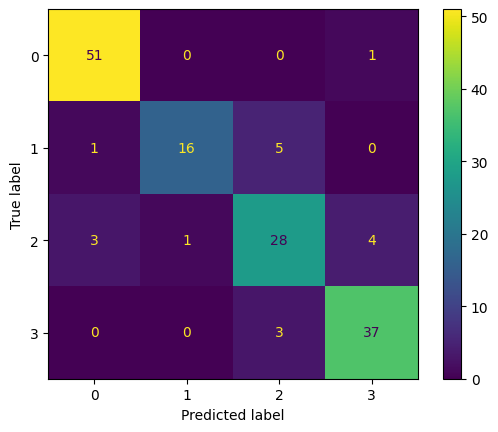

In [ ]:
ConfusionMatrixDisplay.from_predictions(data_1_3_y, y_train_pred)
plt.show()

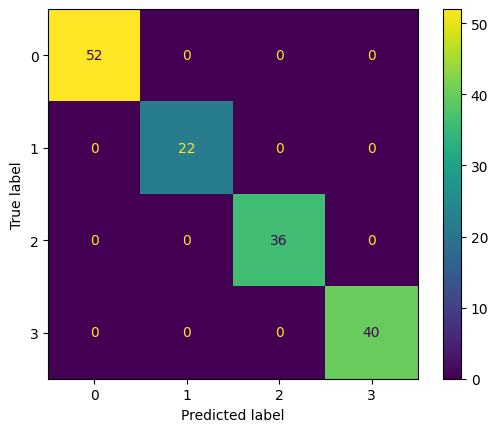

In [ ]:
ConfusionMatrixDisplay.from_predictions(data_1_3_y, data_1_3_y)
plt.show()

### Voting

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
            #('lr', LogisticRegression(solver="liblinear", random_state=42)),
            ('rf', RandomForestClassifier(random_state=42)),
            #('knn',  KNeighborsClassifier(n_neighbors=6)),
            #('dt', DecisionTreeClassifier(max_depth=7, random_state=42)),
            ('gd', GradientBoostingClassifier(random_state=42)),
#            ('svc', SVC(gamma="auto", probability=True, random_state=42))
        ])
voting_clf.fit(data_1_3_cr_train, data_1_3_y)
vt_rmses = cross_val_score(voting_clf, data_1_3_cr_train, data_1_3_y, cv=5)
print(f"{pd.Series(vt_rmses).describe()['mean']:.4f} {vt_rmses}")

0.8800 [0.86666667 0.86666667 0.93333333 0.9        0.83333333]


### Stacking

In [ ]:
for n in range (2, 13):
    stacking_clf = StackingClassifier(
        estimators=[
#            ('lr', LogisticRegression(solver="liblinear", random_state=42)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('knn',  KNeighborsClassifier(n_neighbors=n)),
#            ('dt', DecisionTreeClassifier(max_depth=7, random_state=42)),
            ('gd', GradientBoostingClassifier(random_state=42)),
#            ('svc', SVC(gamma="auto", probability=True, random_state=42))
            ],
        final_estimator=RandomForestClassifier(random_state=43),
        cv=5 # number of cross-validation folds
    )
    stacking_clf.fit(data_1_3_cr_train, data_1_3_y)
    st_rmses = cross_val_score(stacking_clf, data_1_3_cr_train, data_1_3_y, cv=5)
    print(f"n {n}: {pd.Series(st_rmses).describe()['mean']:.4f} {st_rmses}")

n 2: 0.8733 [0.76666667 0.9        0.9        0.93333333 0.86666667]
n 3: 0.8667 [0.8        0.86666667 0.9        0.93333333 0.83333333]
n 4: 0.8667 [0.8        0.86666667 0.86666667 0.93333333 0.86666667]
n 5: 0.8733 [0.8        0.9        0.9        0.93333333 0.83333333]
n 6: 0.8800 [0.8        0.9        0.9        0.93333333 0.86666667]
n 7: 0.8667 [0.8        0.86666667 0.86666667 0.93333333 0.86666667]
n 8: 0.8733 [0.8        0.86666667 0.86666667 0.96666667 0.86666667]
n 9: 0.8667 [0.8        0.86666667 0.86666667 0.93333333 0.86666667]
n 10: 0.8667 [0.8        0.86666667 0.86666667 0.93333333 0.86666667]
n 11: 0.8733 [0.8        0.9        0.86666667 0.93333333 0.86666667]
n 12: 0.8667 [0.8        0.86666667 0.86666667 0.93333333 0.86666667]


In [ ]:
n = 6
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(solver="liblinear", random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('knn',  KNeighborsClassifier(n_neighbors=n)),
        ('dt', DecisionTreeClassifier(max_depth=7, random_state=42)),
        ('gd', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(gamma="auto", probability=True, random_state=42))
        ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5 # number of cross-validation folds
)
stacking_clf.fit(data_1_3_cr_train, data_1_3_y)
st_rmses = cross_val_score(stacking_clf, data_1_3_cr_train, data_1_3_y, cv=5)
print(f"n {n}: {pd.Series(st_rmses).describe()['mean']:.4f} {st_rmses}")

n 6: 0.8733 [0.76666667 0.93333333 0.9        0.93333333 0.83333333]


In [ ]:
n = 6
stacking_clf = StackingClassifier(
    estimators=[
        # ('lr', LogisticRegression(solver="liblinear", random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('knn',  KNeighborsClassifier(n_neighbors=n)),
        ('dt', DecisionTreeClassifier(max_depth=7, random_state=42)),
        ('gd', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(gamma="auto", probability=True, random_state=42))
        ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5 # number of cross-validation folds
)
stacking_clf.fit(data_1_3_cr_train, data_1_3_y)
st_rmses = cross_val_score(stacking_clf, data_1_3_cr_train, data_1_3_y, cv=5)
print(f"n {n}: {pd.Series(st_rmses).describe()['mean']:.4f} {st_rmses}")

n 6: 0.8800 [0.8        0.9        0.86666667 0.96666667 0.86666667]


In [ ]:
n = 6
stacking_clf = StackingClassifier(
    estimators=[
        # ('lr', LogisticRegression(solver="liblinear", random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('knn',  KNeighborsClassifier(n_neighbors=n)),
        ('dt', DecisionTreeClassifier(max_depth=7, random_state=42)),
        ('gd', GradientBoostingClassifier(random_state=42)),
        # ('svc', SVC(gamma="auto", probability=True, random_state=42))
        ],
    final_estimator=GradientBoostingClassifier(random_state=43),
    cv=5 # number of cross-validation folds
)
stacking_clf.fit(data_1_3_cr_train, data_1_3_y)
st_rmses = cross_val_score(stacking_clf, data_1_3_cr_train, data_1_3_y, cv=5)
print(f"n {n}: {pd.Series(st_rmses).describe()['mean']:.4f} {st_rmses}")

n 6: 0.8667 [0.83333333 0.83333333 0.9        0.9        0.86666667]


### GradientBoostingClassifier

In [ ]:
data_1_3 = pd.read_csv("ikm_start_1-3.csv")
data_1_3.head()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1,2.207,71,5,9,34.0,49.0,68,112,11.5,...,0,-1,2.207,4.0,-1,0,55,2,2,3
1,1,0.600,72,6,10,34.1,49.2,69,114,11.5,...,0,-1,0.600,4.1,-1,0,46,2,2,2
2,1,14.775,73,7,11,35.6,49.4,70,115,11.5,...,0,-1,14.775,4.2,-1,0,45,2,2,2
3,1,1.647,74,8,12,37.9,49.0,71,118,11.5,...,0,-1,1.647,4.3,-1,0,61,3,2,3
4,1,12.706,75,5,13,38.5,50.0,72,120,11.5,...,0,-1,12.706,4.4,-1,0,78,3,2,3


In [ ]:
data_1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   группа      150 non-null    int64  
 1   эндотели    150 non-null    float64
 2   ЧСС         150 non-null    int64  
 3   дадпу       150 non-null    int64  
 4   садсу       150 non-null    int64  
 5   дадуп       150 non-null    float64
 6   садуп       150 non-null    float64
 7   дадн        150 non-null    int64  
 8   садн        150 non-null    int64  
 9   вдадн       150 non-null    float64
 10  вдадд       150 non-null    float64
 11  всадн       150 non-null    float64
 12  всадд       150 non-null    float64
 13  сад1        150 non-null    int64  
 14  дад1        150 non-null    int64  
 15  E_A         150 non-null    float64
 16  СрДЛА       150 non-null    float64
 17  ТС_ПЖ       150 non-null    float64
 18  ПП          150 non-null    int64  
 19  IVRT        150 non-null    i

In [ ]:
data_1_3 = data_1_3.sample(frac=1, random_state=42)

In [ ]:
data_1_3_y = np.asarray(data_1_3[['стп_ХОБЛ']]).ravel()
data_1_3_y[:5]

array([1, 0, 1, 2, 2])

In [ ]:
data_1_3_train = data_1_3.drop(['группа', 'стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_1_3_train.head(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
73,8.996,68,10,18,45.7,55.5,85,136,13.1,15.1,...,77.965407,1890,346,0.183069,87,8.996,6.1,10,0,42
18,1.297,91,5,12,38.5,50.0,72,120,11.8,13.8,...,53.510384,2254,415,0.184117,-1,1.297,5.8,-1,0,72
118,-1.000,69,5,10,35.0,51.0,80,122,12.8,16.2,...,56.692281,3169,1049,0.331019,-1,7.800,5.3,-1,0,52


In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_1_3_train))
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_scaled, data_1_3_y, cv=5)
print(pd.Series(gb_rmses).describe()['mean'])

0.8400000000000001


In [ ]:
def feature_test(X, y, best_acc):
    max_acc = 0
    max_acc_ind = 0
    new_best_acc = best_acc
    for ind in range(0, X.shape[1]):
        X_drop = X.drop(X.keys()[ind], axis=1)

        scaler = StandardScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(X_drop))
        gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
        gb_rmses = cross_val_score(gb_classifier, data_scaled, y, cv=5)
        temp_acc = pd.Series(gb_rmses).describe()['mean']

        feature_score = temp_acc - best_acc
        if feature_score > max_acc:
            new_best_acc = temp_acc
            max_acc = feature_score
            max_acc_ind = ind
        print(f"\t{ind + 1} {X.keys()[ind]}: {feature_score:.6f} acc: {temp_acc:.4f}")
    if max_acc:
        print(f"drop: {X.keys()[max_acc_ind]}  acc: {max_acc}")
        X.drop(X.keys()[max_acc_ind], axis=1, inplace=True)
        feature_test(X, y, new_best_acc)
    else:
        return new_best_acc

In [ ]:
print(feature_test(data_1_3_train, data_1_3_y, pd.Series(gb_rmses).describe()['mean']))

	1 эндотели: -0.006667 acc: 0.8333
	2 ЧСС: -0.006667 acc: 0.8333
	3 дадпу: -0.013333 acc: 0.8267
	4 садсу: 0.000000 acc: 0.8400
	5 дадуп: -0.006667 acc: 0.8333
	6 садуп: -0.013333 acc: 0.8267
	7 дадн: -0.013333 acc: 0.8267
	8 садн: -0.013333 acc: 0.8267
	9 вдадн: -0.020000 acc: 0.8200
	10 вдадд: -0.013333 acc: 0.8267
	11 всадн: -0.020000 acc: 0.8200
	12 всадд: -0.013333 acc: 0.8267
	13 сад1: -0.026667 acc: 0.8133
	14 дад1: -0.013333 acc: 0.8267
	15 E_A: -0.013333 acc: 0.8267
	16 СрДЛА: -0.040000 acc: 0.8000
	17 ТС_ПЖ: -0.026667 acc: 0.8133
	18 ПП: -0.020000 acc: 0.8200
	19 IVRT: -0.020000 acc: 0.8200
	20 E_A_ЛЖ: -0.013333 acc: 0.8267
	21 ЛП: -0.020000 acc: 0.8200
	22 ТМЖП: 0.000000 acc: 0.8400
	23 ТЗС_ЛЖ: -0.020000 acc: 0.8200
	24 ФВ: -0.006667 acc: 0.8333
	25 УО: 0.000000 acc: 0.8400
	26 КДО_ЛЖ: 0.000000 acc: 0.8400
	27 КСО_ЛЖ: -0.020000 acc: 0.8200
	28 КДР_ЛЖ: -0.020000 acc: 0.8200
	29 КСР_ЛЖ: -0.013333 acc: 0.8267
	30 no2: -0.006667 acc: 0.8333
	31 no3: -0.006667 acc: 0.8333
	32 эзв

In [ ]:
data_1_3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 73 to 102
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   эндотели   150 non-null    float64
 1   ЧСС        150 non-null    int64  
 2   дадпу      150 non-null    int64  
 3   садсу      150 non-null    int64  
 4   дадуп      150 non-null    float64
 5   садуп      150 non-null    float64
 6   дадн       150 non-null    int64  
 7   садн       150 non-null    int64  
 8   вдадн      150 non-null    float64
 9   вдадд      150 non-null    float64
 10  всадн      150 non-null    float64
 11  всадд      150 non-null    float64
 12  сад1       150 non-null    int64  
 13  дад1       150 non-null    int64  
 14  E_A        150 non-null    float64
 15  СрДЛА      150 non-null    float64
 16  ТС_ПЖ      150 non-null    float64
 17  ПП         150 non-null    int64  
 18  IVRT       150 non-null    int64  
 19  E_A_ЛЖ     150 non-null    float64
 20  ЛП       

In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_1_3_train))
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_scaled, data_1_3_y, cv=5)
print(pd.Series(gb_rmses).describe()['mean'])

0.8400000000000001
